In [113]:
# import required libraries
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

In [664]:
# User Defining values
m = -1000
b = -1000
n = 200

In [665]:
# generate random values
def random_value_generate(noOfSamples):
    rand_values = np.array(random.sample(range(noOfSamples), noOfSamples))
    return rand_values

# Add Random noise
def rand_noise(nOfValues):
    f = random.sample(range(-10, 10), nOfValues) 
    return f[0]

In [666]:
x = random_value_generate(n)
x

array([  8, 170,  33, 168,  94,  42, 127, 150,  69,  15, 143, 164, 191,
        34, 109,  51,  55,  95,  91, 184,  54,  11, 112, 177, 195,  20,
       171, 128, 169,  24, 152, 117, 125, 124, 163, 183,  47, 103,  92,
         2,  48, 196, 166, 172,  81,  98,  74, 156,  18,  60,  85, 129,
       126,  66,  40,  38, 139, 145, 161, 122,  26,   7,  31, 148,  97,
       176, 173,  89,  13, 118,  70, 110,  64, 113,  28,  72, 111, 194,
       138, 135, 120,   9, 167, 197,  67,  22,  77, 141,  52,  19,  21,
         0, 142, 155,  37,   1,  87,  39, 154,  17,  30,  68, 189, 102,
       186, 175, 188, 158,  58,   4,  59,  12, 136,  23,  57, 153, 162,
       190,  75,  90, 185,  76,   3, 130, 106, 132,  32,  46,  82, 198,
       199, 119,  45,  63, 104,  99,  16, 151,  36,  83,  86,  73,   6,
        84,  41,  62, 182,  49,  14, 147, 133, 159,  88,  10,   5, 101,
       105,  29, 174, 146,  53,  43, 137, 179,  35, 121, 160, 116,  56,
       123,  96, 114,  79,  44, 144,  65, 131, 140,  71, 157,  8

In [667]:
#y = m*x + b
y = np.array([m*(i+rand_noise(1)) + (b+rand_noise(1)) for i in x]) # adding noise to x and b
y

array([ -12003, -163994,  -36010, -168992,  -93993,  -44008, -132994,
       -152007,  -72999,  -12010, -145001, -161006, -199996,  -29003,
       -105992,  -44008,  -62995,  -97006,  -90992, -178993,  -49992,
        -14000, -110998, -173997, -190004,  -17003, -164004, -119003,
       -161991,  -15010, -157995, -116005, -121997, -126010, -171994,
       -179006,  -39009, -102993,  -87000,   -4001,  -51998, -205000,
       -162994, -178999,  -79999,  -89005,  -77004, -154005,  -18999,
        -52004,  -76000, -123998, -120001,  -76010,  -41009,  -44998,
       -135006, -150993, -157009, -130003,  -32992,  -11991,  -27991,
       -144998,  -98010, -176002, -167009,  -81000,   -9997, -113993,
        -73995, -119998,  -65997, -123009,  -24002,  -74994, -119992,
       -193004, -142006, -144006, -118006,   -6003, -170999, -192010,
        -64996,  -21993,  -80991, -143006,  -55996,  -22995,  -29005,
         -4999, -144008, -162998,  -42005,    7000,  -82998,  -35002,
       -153998,  -12

In [668]:
m, b

(-1000, -1000)

In [669]:
# predicted by y = mx + b without adding noise
y_hat = m * x + b
y_hat 

array([  -9000, -171000,  -34000, -169000,  -95000,  -43000, -128000,
       -151000,  -70000,  -16000, -144000, -165000, -192000,  -35000,
       -110000,  -52000,  -56000,  -96000,  -92000, -185000,  -55000,
        -12000, -113000, -178000, -196000,  -21000, -172000, -129000,
       -170000,  -25000, -153000, -118000, -126000, -125000, -164000,
       -184000,  -48000, -104000,  -93000,   -3000,  -49000, -197000,
       -167000, -173000,  -82000,  -99000,  -75000, -157000,  -19000,
        -61000,  -86000, -130000, -127000,  -67000,  -41000,  -39000,
       -140000, -146000, -162000, -123000,  -27000,   -8000,  -32000,
       -149000,  -98000, -177000, -174000,  -90000,  -14000, -119000,
        -71000, -111000,  -65000, -114000,  -29000,  -73000, -112000,
       -195000, -139000, -136000, -121000,  -10000, -168000, -198000,
        -68000,  -23000,  -78000, -142000,  -53000,  -20000,  -22000,
         -1000, -143000, -156000,  -38000,   -2000,  -88000,  -40000,
       -155000,  -18

Text(0, 0.5, 'y - axis')

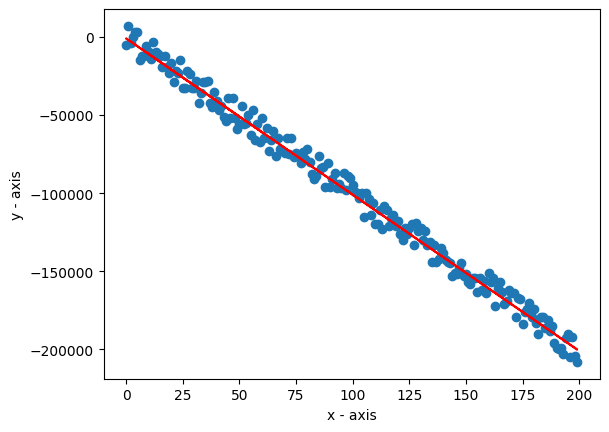

In [670]:
# Visualization of x, y and y_hat
plt.scatter(x[:], y[:])
plt.plot(x[:], y_hat[:], color = 'red')
plt.xlabel("x - axis")
plt.ylabel("y - axis")

# Apply Linear Regression with Stochastic Gradient Descent 

In [671]:
# Initialize variables
epochs = 10000 # number of epochs
lr = 0.00001 # learning_rate
m, b = 0, 0 # initialize m and b as 1, 1

old_m0, old_b0 = m, b

# empty lists
finall_loss_list = []
finall_rmse_list = []
finall_m_list = []
finall_b_list = []

for epoch in range(epochs):
    
    # append single iteration loss in a list
    loss_list = []
    
    # zipping x, y and iterate, one by one 
    for x1,y1 in zip(x,y): 
        
        # find y_hat for the respective x1 using the initialized new m and b
        y_hat = old_m0*x1 + old_b0
        
        # find the difference between actual y and y_hat(predicted y)
        # MSE - Mean Squard Error
        diff = (y_hat - y1)
        # sqaure the difference 
        loss = diff**2
        # append to the loss_list
        loss_list.append(loss)
    
        # find the derivative of m 
        derivative_of_m = 2*(y_hat - y1) * x1
        
        # find the derivative of b
        derivative_of_b = 2*(y_hat - y1)
        
        # update new m and b with respect of old-m and old-b
        old_m0 = old_m0 - lr*derivative_of_m
        old_b0 = old_b0 - lr*derivative_of_b

    # length of x
    n = len(x)
    # suming loss and dividing it by the length of x
    floss = sum(loss_list) / n    
    
    print(f"Iteration - {epoch} -> mse_loss: {floss}, new_m0 : {old_m0} and new_b0 : {old_b0}")
    # append new_m0 and new_b0 to the finall_m_list, finall_b_list respectively
    finall_m_list.append(old_m0)
    finall_b_list.append(old_b0)
    
    # append the floss to the finall_loss_list
    finall_loss_list.append(floss)

Iteration - 0 -> mse_loss: 208094477.3169354, new_m0 : -1007.3505049243668 and new_b0 : -6.9327261262683635
Iteration - 1 -> mse_loss: 39497112.27692267, new_m0 : -1007.3493271657373 and new_b0 : -7.082467087660482
Iteration - 2 -> mse_loss: 39497118.53580084, new_m0 : -1007.3481505941272 and new_b0 : -7.232057130684047
Iteration - 3 -> mse_loss: 39497124.800417215, new_m0 : -1007.34697520834 and new_b0 : -7.381496407444092
Iteration - 4 -> mse_loss: 39497131.07074178, new_m0 : -1007.3458010071804 and new_b0 : -7.530785069892364
Iteration - 5 -> mse_loss: 39497137.34674463, new_m0 : -1007.344627989455 and new_b0 : -7.679923269827436
Iteration - 6 -> mse_loss: 39497143.628395766, new_m0 : -1007.3434561539706 and new_b0 : -7.828911158894904
Iteration - 7 -> mse_loss: 39497149.91566539, new_m0 : -1007.3422854995357 and new_b0 : -7.977748888587531
Iteration - 8 -> mse_loss: 39497156.20852386, new_m0 : -1007.3411160249601 and new_b0 : -8.126436610245372
Iteration - 9 -> mse_loss: 39497162.5

Iteration - 665 -> mse_loss: 39501554.871396646, new_m0 : -1006.7795632564633 and new_b0 : -79.52260329982279
Iteration - 666 -> mse_loss: 39501561.06493452, new_m0 : -1006.778960928793 and new_b0 : -79.59918361275597
Iteration - 667 -> mse_loss: 39501567.25538722, new_m0 : -1006.7783592081868 and new_b0 : -79.67568674322833
Iteration - 668 -> mse_loss: 39501573.442751504, new_m0 : -1006.7777580940324 and new_b0 : -79.75211276902903
Iteration - 669 -> mse_loss: 39501579.62702414, new_m0 : -1006.7771575857183 and new_b0 : -79.82846176786919
Iteration - 670 -> mse_loss: 39501585.8082019, new_m0 : -1006.7765576826347 and new_b0 : -79.90473381738136
Iteration - 671 -> mse_loss: 39501591.98628162, new_m0 : -1006.7759583841711 and new_b0 : -79.98092899512011
Iteration - 672 -> mse_loss: 39501598.16126007, new_m0 : -1006.7753596897182 and new_b0 : -80.0570473785614
Iteration - 673 -> mse_loss: 39501604.33313408, new_m0 : -1006.7747615986673 and new_b0 : -80.13308904510356
Iteration - 674 -> m

Iteration - 1168 -> mse_loss: 39504245.30033393, new_m0 : -1006.541810410735 and new_b0 : -109.75064731778208
Iteration - 1169 -> mse_loss: 39504249.78108103, new_m0 : -1006.5414477053516 and new_b0 : -109.79676190480257
Iteration - 1170 -> mse_loss: 39504254.25845695, new_m0 : -1006.5410853655256 and new_b0 : -109.84283001463892
Iteration - 1171 -> mse_loss: 39504258.73246277, new_m0 : -1006.5407233908886 and new_b0 : -109.88885169413373
Iteration - 1172 -> mse_loss: 39504263.2030996, new_m0 : -1006.5403617810722 and new_b0 : -109.93482699008243
Iteration - 1173 -> mse_loss: 39504267.670368545, new_m0 : -1006.5400005357089 and new_b0 : -109.98075594923324
Iteration - 1174 -> mse_loss: 39504272.134270646, new_m0 : -1006.5396396544318 and new_b0 : -110.02663861828746
Iteration - 1175 -> mse_loss: 39504276.59480707, new_m0 : -1006.5392791368731 and new_b0 : -110.072475043899
Iteration - 1176 -> mse_loss: 39504281.05197888, new_m0 : -1006.538918982667 and new_b0 : -110.1182652726749
Itera

Iteration - 1663 -> mse_loss: 39506079.19041304, new_m0 : -1006.4003973387348 and new_b0 : -127.72999285222154
Iteration - 1664 -> mse_loss: 39506082.18167344, new_m0 : -1006.4001771583487 and new_b0 : -127.75798672283666
Iteration - 1665 -> mse_loss: 39506085.17034095, new_m0 : -1006.3999571998743 and new_b0 : -127.7859523794665
Iteration - 1666 -> mse_loss: 39506088.15641736, new_m0 : -1006.3997374630878 and new_b0 : -127.81388985054687
Iteration - 1667 -> mse_loss: 39506091.13990437, new_m0 : -1006.399517947766 and new_b0 : -127.84179916448485
Iteration - 1668 -> mse_loss: 39506094.12080372, new_m0 : -1006.3992986536855 and new_b0 : -127.86968034965902
Iteration - 1669 -> mse_loss: 39506097.099117234, new_m0 : -1006.3990795806235 and new_b0 : -127.89753343441946
Iteration - 1670 -> mse_loss: 39506100.074846625, new_m0 : -1006.398860728357 and new_b0 : -127.92535844708748
Iteration - 1671 -> mse_loss: 39506103.04799372, new_m0 : -1006.3986420966636 and new_b0 : -127.9531554159558
Ite

Iteration - 2164 -> mse_loss: 39507288.93365508, new_m0 : -1006.3137525556177 and new_b0 : -138.74606422654787
Iteration - 2165 -> mse_loss: 39507290.83881812, new_m0 : -1006.3136197012992 and new_b0 : -138.76295540686255
Iteration - 2166 -> mse_loss: 39507292.742214665, new_m0 : -1006.3134869808794 and new_b0 : -138.77982956318198
Iteration - 2167 -> mse_loss: 39507294.643846095, new_m0 : -1006.313354394224 and new_b0 : -138.7966867126644
Iteration - 2168 -> mse_loss: 39507296.543713935, new_m0 : -1006.3132219411976 and new_b0 : -138.81352687245024
Iteration - 2169 -> mse_loss: 39507298.4418196, new_m0 : -1006.3130896216658 and new_b0 : -138.83035005966275
Iteration - 2170 -> mse_loss: 39507300.33816463, new_m0 : -1006.3129574354939 and new_b0 : -138.84715629140806
Iteration - 2171 -> mse_loss: 39507302.232750446, new_m0 : -1006.3128253825474 and new_b0 : -138.8639455847747
Iteration - 2172 -> mse_loss: 39507304.12557851, new_m0 : -1006.3126934626923 and new_b0 : -138.88071795683456
I

Iteration - 2719 -> mse_loss: 39508112.970385596, new_m0 : -1006.2572569188891 and new_b0 : -145.92895446124672
Iteration - 2720 -> mse_loss: 39508114.09637639, new_m0 : -1006.2571810044302 and new_b0 : -145.9386062725495
Iteration - 2721 -> mse_loss: 39508115.22128246, new_m0 : -1006.2571051664828 and new_b0 : -145.94824835614926
Iteration - 2722 -> mse_loss: 39508116.34510482, new_m0 : -1006.2570294049696 and new_b0 : -145.95788072184996
Iteration - 2723 -> mse_loss: 39508117.467844464, new_m0 : -1006.2569537198135 and new_b0 : -145.96750337944601
Iteration - 2724 -> mse_loss: 39508118.589502424, new_m0 : -1006.2568781109378 and new_b0 : -145.97711633872214
Iteration - 2725 -> mse_loss: 39508119.71007961, new_m0 : -1006.2568025782655 and new_b0 : -145.98671960945242
Iteration - 2726 -> mse_loss: 39508120.82957708, new_m0 : -1006.2567271217197 and new_b0 : -145.99631320140202
Iteration - 2727 -> mse_loss: 39508121.947995774, new_m0 : -1006.2566517412238 and new_b0 : -146.0058971243257

Iteration - 3174 -> mse_loss: 39508527.40022211, new_m0 : -1006.2295410610985 and new_b0 : -149.45276578187975
Iteration - 3175 -> mse_loss: 39508528.12347265, new_m0 : -1006.2294930804261 and new_b0 : -149.45886607427516
Iteration - 3176 -> mse_loss: 39508528.84601423, new_m0 : -1006.2294451481116 and new_b0 : -149.46496021841173
Iteration - 3177 -> mse_loss: 39508529.56784764, new_m0 : -1006.2293972641064 and new_b0 : -149.47104822048613
Iteration - 3178 -> mse_loss: 39508530.28897346, new_m0 : -1006.2293494283617 and new_b0 : -149.4771300866888
Iteration - 3179 -> mse_loss: 39508531.00939241, new_m0 : -1006.2293016408288 and new_b0 : -149.48320582320372
Iteration - 3180 -> mse_loss: 39508531.72910519, new_m0 : -1006.2292539014593 and new_b0 : -149.48927543620877
Iteration - 3181 -> mse_loss: 39508532.448112346, new_m0 : -1006.2292062102046 and new_b0 : -149.49533893187586
Iteration - 3182 -> mse_loss: 39508533.166414715, new_m0 : -1006.2291585670159 and new_b0 : -149.50139631637026


Iteration - 3668 -> mse_loss: 39508810.46090285, new_m0 : -1006.2108633145642 and new_b0 : -151.82746604114575
Iteration - 3669 -> mse_loss: 39508810.90513882, new_m0 : -1006.2108341585008 and new_b0 : -151.83117296110913
Iteration - 3670 -> mse_loss: 39508811.34893445, new_m0 : -1006.2108050318226 and new_b0 : -151.8348761450054
Iteration - 3671 -> mse_loss: 39508811.792290166, new_m0 : -1006.2107759345002 and new_b0 : -151.83857559659975
Iteration - 3672 -> mse_loss: 39508812.235206425, new_m0 : -1006.2107468665038 and new_b0 : -151.8422713196538
Iteration - 3673 -> mse_loss: 39508812.677683674, new_m0 : -1006.210717827804 and new_b0 : -151.8459633179254
Iteration - 3674 -> mse_loss: 39508813.119722225, new_m0 : -1006.2106888183713 and new_b0 : -151.84965159516833
Iteration - 3675 -> mse_loss: 39508813.56132263, new_m0 : -1006.2106598381761 and new_b0 : -151.85333615513363
Iteration - 3676 -> mse_loss: 39508814.00248527, new_m0 : -1006.2106308871888 and new_b0 : -151.85701700156733
I

Iteration - 4186 -> mse_loss: 39508990.397846945, new_m0 : -1006.1990932281287 and new_b0 : -153.3239221183877
Iteration - 4187 -> mse_loss: 39508990.66311108, new_m0 : -1006.1990759346994 and new_b0 : -153.32612081569988
Iteration - 4188 -> mse_loss: 39508990.928110495, new_m0 : -1006.1990586586994 and new_b0 : -153.3283172970264
Iteration - 4189 -> mse_loss: 39508991.19284536, new_m0 : -1006.1990414001114 and new_b0 : -153.33051156460078
Iteration - 4190 -> mse_loss: 39508991.45731604, new_m0 : -1006.1990241589174 and new_b0 : -153.33270362065426
Iteration - 4191 -> mse_loss: 39508991.72152276, new_m0 : -1006.1990069351004 and new_b0 : -153.33489346741564
Iteration - 4192 -> mse_loss: 39508991.98546577, new_m0 : -1006.1989897286427 and new_b0 : -153.33708110711143
Iteration - 4193 -> mse_loss: 39508992.24914536, new_m0 : -1006.1989725395267 and new_b0 : -153.3392665419661
Iteration - 4194 -> mse_loss: 39508992.51256174, new_m0 : -1006.198955367735 and new_b0 : -153.34144977420203
Ite

Iteration - 4739 -> mse_loss: 39509103.13033058, new_m0 : -1006.1917590767472 and new_b0 : -154.2563906661925
Iteration - 4740 -> mse_loss: 39509103.2828441, new_m0 : -1006.1917491751374 and new_b0 : -154.25764956299415
Iteration - 4741 -> mse_loss: 39509103.435204715, new_m0 : -1006.191739283507 and new_b0 : -154.2589071910006
Iteration - 4742 -> mse_loss: 39509103.58741266, new_m0 : -1006.1917294018461 and new_b0 : -154.26016355149005
Iteration - 4743 -> mse_loss: 39509103.73946803, new_m0 : -1006.1917195301446 and new_b0 : -154.26141864574024
Iteration - 4744 -> mse_loss: 39509103.89137098, new_m0 : -1006.1917096683923 and new_b0 : -154.2626724750274
Iteration - 4745 -> mse_loss: 39509104.043121755, new_m0 : -1006.1916998165792 and new_b0 : -154.2639250406266
Iteration - 4746 -> mse_loss: 39509104.19472036, new_m0 : -1006.1916899746956 and new_b0 : -154.26517634381142
Iteration - 4747 -> mse_loss: 39509104.34616701, new_m0 : -1006.1916801427312 and new_b0 : -154.2664263858541
Iterat

Iteration - 5254 -> mse_loss: 39509164.49580532, new_m0 : -1006.1877795248513 and new_b0 : -154.76235335830378
Iteration - 5255 -> mse_loss: 39509164.586744405, new_m0 : -1006.1877736340845 and new_b0 : -154.76310231404892
Iteration - 5256 -> mse_loss: 39509164.67759212, new_m0 : -1006.1877677492546 and new_b0 : -154.76385051494972
Iteration - 5257 -> mse_loss: 39509164.7683486, new_m0 : -1006.1877618703561 and new_b0 : -154.76459796176616
Iteration - 5258 -> mse_loss: 39509164.85901391, new_m0 : -1006.1877559973824 and new_b0 : -154.76534465525876
Iteration - 5259 -> mse_loss: 39509164.94958816, new_m0 : -1006.187750130328 and new_b0 : -154.76609059618664
Iteration - 5260 -> mse_loss: 39509165.04007143, new_m0 : -1006.187744269187 and new_b0 : -154.76683578530813
Iteration - 5261 -> mse_loss: 39509165.13046375, new_m0 : -1006.187738413953 and new_b0 : -154.76758022338132
Iteration - 5262 -> mse_loss: 39509165.220765285, new_m0 : -1006.1877325646202 and new_b0 : -154.76832391116284
Ite

Iteration - 5762 -> mse_loss: 39509200.68870908, new_m0 : -1006.1854366005514 and new_b0 : -155.0602342044859
Iteration - 5763 -> mse_loss: 39509200.74326674, new_m0 : -1006.1854330711311 and new_b0 : -155.06068293716
Iteration - 5764 -> mse_loss: 39509200.79776959, new_m0 : -1006.1854295452681 and new_b0 : -155.06113121757284
Iteration - 5765 -> mse_loss: 39509200.85221755, new_m0 : -1006.1854260229586 and new_b0 : -155.0615790461804
Iteration - 5766 -> mse_loss: 39509200.90661078, new_m0 : -1006.1854225041991 and new_b0 : -155.06202642343834
Iteration - 5767 -> mse_loss: 39509200.96094926, new_m0 : -1006.1854189889862 and new_b0 : -155.0624733498012
Iteration - 5768 -> mse_loss: 39509201.0152331, new_m0 : -1006.1854154773158 and new_b0 : -155.0629198257237
Iteration - 5769 -> mse_loss: 39509201.06946236, new_m0 : -1006.1854119691851 and new_b0 : -155.06336585165954
Iteration - 5770 -> mse_loss: 39509201.123637006, new_m0 : -1006.1854084645898 and new_b0 : -155.06381142806228
Iteratio

Iteration - 6196 -> mse_loss: 39509219.881824076, new_m0 : -1006.1841954015082 and new_b0 : -155.21804101937707
Iteration - 6197 -> mse_loss: 39509219.91706912, new_m0 : -1006.1841931230464 and new_b0 : -155.21833070440744
Iteration - 6198 -> mse_loss: 39509219.95227866, new_m0 : -1006.1841908468812 and new_b0 : -155.2186200974751
Iteration - 6199 -> mse_loss: 39509219.98745281, new_m0 : -1006.1841885730098 and new_b0 : -155.21890919887417
Iteration - 6200 -> mse_loss: 39509220.02259148, new_m0 : -1006.1841863014303 and new_b0 : -155.21919800889862
Iteration - 6201 -> mse_loss: 39509220.05769486, new_m0 : -1006.1841840321404 and new_b0 : -155.21948652784215
Iteration - 6202 -> mse_loss: 39509220.09276287, new_m0 : -1006.1841817651373 and new_b0 : -155.21977475599815
Iteration - 6203 -> mse_loss: 39509220.12779553, new_m0 : -1006.1841795004192 and new_b0 : -155.22006269365946
Iteration - 6204 -> mse_loss: 39509220.162792996, new_m0 : -1006.1841772379836 and new_b0 : -155.22035034111934


Iteration - 6708 -> mse_loss: 39509233.987721294, new_m0 : -1006.1832837407007 and new_b0 : -155.33395013890376
Iteration - 6709 -> mse_loss: 39509234.00876395, new_m0 : -1006.1832823810682 and new_b0 : -155.3341230034259
Iteration - 6710 -> mse_loss: 39509234.0297854, new_m0 : -1006.183281022806 and new_b0 : -155.33429569372436
Iteration - 6711 -> mse_loss: 39509234.050785735, new_m0 : -1006.1832796659127 and new_b0 : -155.33446820997463
Iteration - 6712 -> mse_loss: 39509234.071764864, new_m0 : -1006.1832783103871 and new_b0 : -155.33464055235228
Iteration - 6713 -> mse_loss: 39509234.09272287, new_m0 : -1006.1832769562275 and new_b0 : -155.3348127210324
Iteration - 6714 -> mse_loss: 39509234.11365983, new_m0 : -1006.1832756034328 and new_b0 : -155.33498471618998
Iteration - 6715 -> mse_loss: 39509234.13457558, new_m0 : -1006.1832742520016 and new_b0 : -155.33515653800018
Iteration - 6716 -> mse_loss: 39509234.155470386, new_m0 : -1006.1832729019322 and new_b0 : -155.3353281866374
It

Iteration - 7186 -> mse_loss: 39509241.9739377, new_m0 : -1006.1827678008558 and new_b0 : -155.3995470502441
Iteration - 7187 -> mse_loss: 39509241.9869363, new_m0 : -1006.18276696122 and new_b0 : -155.39965380206917
Iteration - 7188 -> mse_loss: 39509241.99992177, new_m0 : -1006.1827661224304 and new_b0 : -155.39976044630285
Iteration - 7189 -> mse_loss: 39509242.01289416, new_m0 : -1006.182765284486 and new_b0 : -155.39986698305376
Iteration - 7190 -> mse_loss: 39509242.02585352, new_m0 : -1006.1827644473864 and new_b0 : -155.39997341243054
Iteration - 7191 -> mse_loss: 39509242.038799815, new_m0 : -1006.1827636111303 and new_b0 : -155.40007973454112
Iteration - 7192 -> mse_loss: 39509242.05173303, new_m0 : -1006.182762775717 and new_b0 : -155.4001859494934
Iteration - 7193 -> mse_loss: 39509242.064653255, new_m0 : -1006.1827619411458 and new_b0 : -155.4002920573957
Iteration - 7194 -> mse_loss: 39509242.077560484, new_m0 : -1006.1827611074159 and new_b0 : -155.40039805835545
Iterati

Iteration - 7641 -> mse_loss: 39509246.720042914, new_m0 : -1006.1824612554515 and new_b0 : -155.43852142277336
Iteration - 7642 -> mse_loss: 39509246.72825988, new_m0 : -1006.1824607247714 and new_b0 : -155.43858889377213
Iteration - 7643 -> mse_loss: 39509246.73646858, new_m0 : -1006.182460194626 and new_b0 : -155.43865629676915
Iteration - 7644 -> mse_loss: 39509246.74466905, new_m0 : -1006.1824596650151 and new_b0 : -155.4387236318331
Iteration - 7645 -> mse_loss: 39509246.7528612, new_m0 : -1006.182459135938 and new_b0 : -155.43879089903257
Iteration - 7646 -> mse_loss: 39509246.76104516, new_m0 : -1006.182458607394 and new_b0 : -155.4388580984358
Iteration - 7647 -> mse_loss: 39509246.7692208, new_m0 : -1006.1824580793827 and new_b0 : -155.4389252301113
Iteration - 7648 -> mse_loss: 39509246.777388304, new_m0 : -1006.1824575519038 and new_b0 : -155.4389922941273
Iteration - 7649 -> mse_loss: 39509246.78554747, new_m0 : -1006.1824570249563 and new_b0 : -155.43905929055194
Iteratio

Iteration - 8108 -> mse_loss: 39509249.78215845, new_m0 : -1006.1822635050432 and new_b0 : -155.4636635321277
Iteration - 8109 -> mse_loss: 39509249.78728998, new_m0 : -1006.1822631736683 and new_b0 : -155.4637056633255
Iteration - 8110 -> mse_loss: 39509249.79241637, new_m0 : -1006.1822628426276 and new_b0 : -155.46374775206078
Iteration - 8111 -> mse_loss: 39509249.7975376, new_m0 : -1006.1822625119204 and new_b0 : -155.46378979837644
Iteration - 8112 -> mse_loss: 39509249.802653596, new_m0 : -1006.1822621815464 and new_b0 : -155.46383180231504
Iteration - 8113 -> mse_loss: 39509249.80776451, new_m0 : -1006.1822618515056 and new_b0 : -155.46387376391957
Iteration - 8114 -> mse_loss: 39509249.812870234, new_m0 : -1006.1822615217974 and new_b0 : -155.46391568323241
Iteration - 8115 -> mse_loss: 39509249.81797084, new_m0 : -1006.1822611924213 and new_b0 : -155.4639575602964
Iteration - 8116 -> mse_loss: 39509249.823066294, new_m0 : -1006.1822608633773 and new_b0 : -155.46399939515416
It

Iteration - 8599 -> mse_loss: 39509251.77044498, new_m0 : -1006.1821351139429 and new_b0 : -155.47998725610884
Iteration - 8600 -> mse_loss: 39509251.773572914, new_m0 : -1006.1821349119687 and new_b0 : -155.48001293522987
Iteration - 8601 -> mse_loss: 39509251.776697636, new_m0 : -1006.182134710198 and new_b0 : -155.48003858846994
Iteration - 8602 -> mse_loss: 39509251.77981925, new_m0 : -1006.182134508631 and new_b0 : -155.48006421585478
Iteration - 8603 -> mse_loss: 39509251.782937735, new_m0 : -1006.1821343072667 and new_b0 : -155.48008981741106
Iteration - 8604 -> mse_loss: 39509251.78605304, new_m0 : -1006.1821341061057 and new_b0 : -155.4801153931645
Iteration - 8605 -> mse_loss: 39509251.78916526, new_m0 : -1006.1821339051472 and new_b0 : -155.48014094314098
Iteration - 8606 -> mse_loss: 39509251.79227429, new_m0 : -1006.1821337043913 and new_b0 : -155.4801664673666
Iteration - 8607 -> mse_loss: 39509251.79538023, new_m0 : -1006.1821335038379 and new_b0 : -155.4801919658672
Ite

Iteration - 9140 -> mse_loss: 39509253.07539535, new_m0 : -1006.1820508534578 and new_b0 : -155.4907001863559
Iteration - 9141 -> mse_loss: 39509253.07720813, new_m0 : -1006.1820507364067 and new_b0 : -155.49071506831115
Iteration - 9142 -> mse_loss: 39509253.07901917, new_m0 : -1006.1820506194736 and new_b0 : -155.4907299352676
Iteration - 9143 -> mse_loss: 39509253.08082831, new_m0 : -1006.1820505026582 and new_b0 : -155.49074478724012
Iteration - 9144 -> mse_loss: 39509253.08263565, new_m0 : -1006.1820503859606 and new_b0 : -155.49075962424388
Iteration - 9145 -> mse_loss: 39509253.08444121, new_m0 : -1006.1820502693806 and new_b0 : -155.49077444629407
Iteration - 9146 -> mse_loss: 39509253.08624491, new_m0 : -1006.1820501529182 and new_b0 : -155.4907892534057
Iteration - 9147 -> mse_loss: 39509253.08804678, new_m0 : -1006.182050036573 and new_b0 : -155.49080404559345
Iteration - 9148 -> mse_loss: 39509253.08984684, new_m0 : -1006.1820499203452 and new_b0 : -155.49081882287302
Itera

Iteration - 9597 -> mse_loss: 39509253.73954406, new_m0 : -1006.1820079709853 and new_b0 : -155.49615229045966
Iteration - 9598 -> mse_loss: 39509253.7406876, new_m0 : -1006.1820078971539 and new_b0 : -155.49616167744134
Iteration - 9599 -> mse_loss: 39509253.74182995, new_m0 : -1006.1820078233967 and new_b0 : -155.49617105496222
Iteration - 9600 -> mse_loss: 39509253.74297112, new_m0 : -1006.182007749714 and new_b0 : -155.49618042303186
Iteration - 9601 -> mse_loss: 39509253.74411115, new_m0 : -1006.1820076761056 and new_b0 : -155.49618978165992
Iteration - 9602 -> mse_loss: 39509253.745250046, new_m0 : -1006.1820076025712 and new_b0 : -155.49619913085556
Iteration - 9603 -> mse_loss: 39509253.74638774, new_m0 : -1006.182007529111 and new_b0 : -155.49620847062846
Iteration - 9604 -> mse_loss: 39509253.74752435, new_m0 : -1006.1820074557248 and new_b0 : -155.49621780098806
Iteration - 9605 -> mse_loss: 39509253.7486598, new_m0 : -1006.1820073824128 and new_b0 : -155.4962271219441
Itera

In [672]:
finall_loss_list[-5:]

[39509254.11460351,
 39509254.115368985,
 39509254.11613371,
 39509254.11689766,
 39509254.11766086]

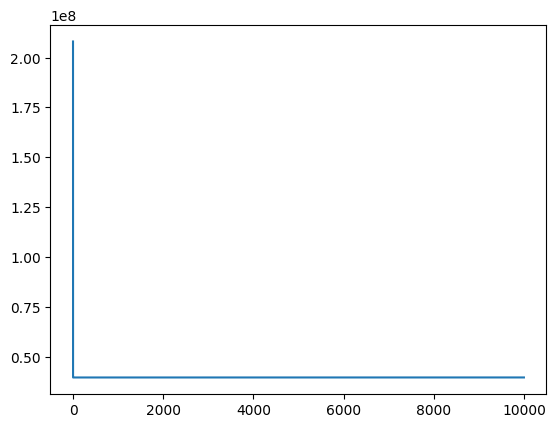

In [673]:
plt.plot(finall_loss_list)

In [674]:
# finall updated m and b
old_m0, old_b0

(-1006.1819835573681, -155.49925625287364)

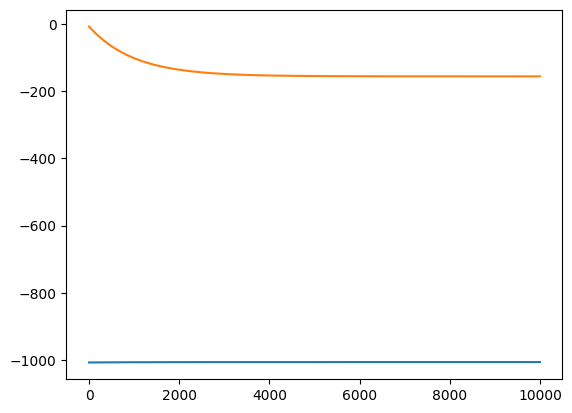

In [675]:
## heck finall_m_list , finall_b_list convergence
plt.plot(finall_m_list)
plt.plot(finall_b_list)

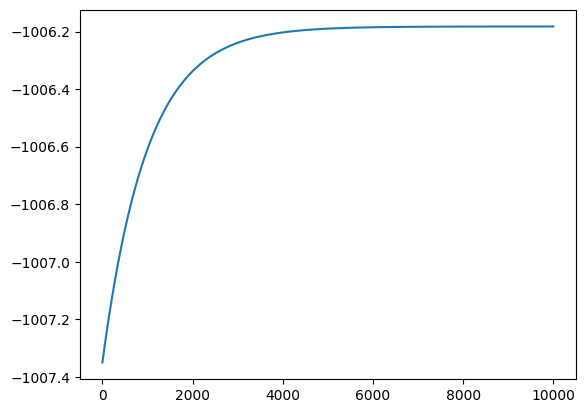

In [676]:
# plot finall_m_list
plt.plot(finall_m_list)

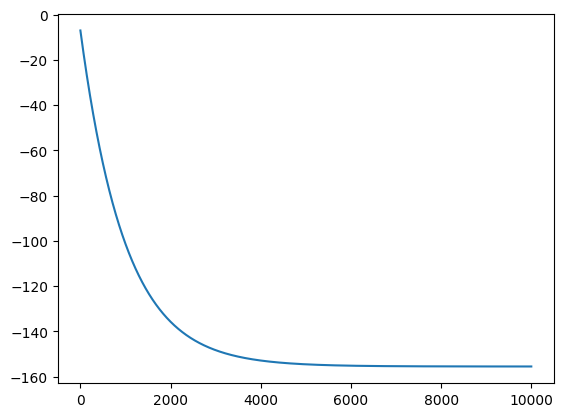

In [677]:
# plot finall_b_list
plt.plot(finall_b_list)

In [678]:
len(finall_m_list)

10000

In [679]:
# fit the data points using new m and b
y_hat2 = old_m0*x + old_b0
y_hat2

array([-8.20495512e+03, -1.71206436e+05, -3.33595047e+04, -1.69194072e+05,
       -9.47366057e+04, -4.24151426e+04, -1.27940611e+05, -1.51082797e+05,
       -6.95820561e+04, -1.52482290e+04, -1.44039523e+05, -1.65169345e+05,
       -1.92336258e+05, -3.43656867e+04, -1.09829335e+05, -5.14707804e+04,
       -5.54955084e+04, -9.57427877e+04, -9.17180598e+04, -1.85292984e+05,
       -5.44893264e+04, -1.12235011e+04, -1.12847881e+05, -1.78249710e+05,
       -1.96360986e+05, -2.02791389e+04, -1.72212618e+05, -1.28946793e+05,
       -1.70200254e+05, -2.43038669e+04, -1.53095161e+05, -1.17878791e+05,
       -1.25928247e+05, -1.24922065e+05, -1.64163163e+05, -1.84286802e+05,
       -4.74460525e+04, -1.03792244e+05, -9.27242417e+04, -2.16786322e+03,
       -4.84522345e+04, -1.97367168e+05, -1.67181709e+05, -1.73218800e+05,
       -8.16562399e+04, -9.87613336e+04, -7.46129660e+04, -1.57119889e+05,
       -1.82667750e+04, -6.05264183e+04, -8.56809679e+04, -1.29952975e+05,
       -1.26934429e+05, -

# predicted

Text(0, 0.5, 'y - axis')

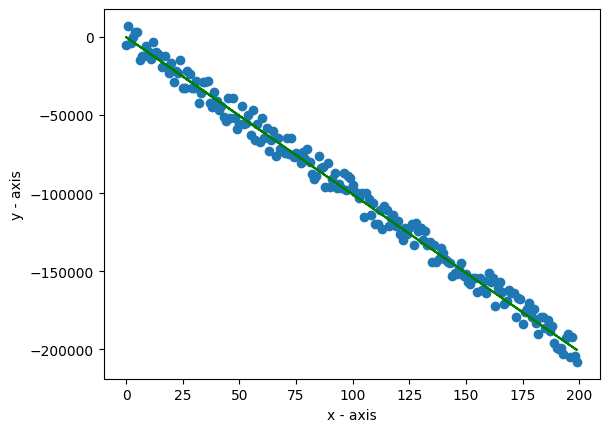

In [680]:
plt.scatter(x, y)
plt.plot(x[:], y_hat2, color='green')
plt.xlabel("x - axis")
plt.ylabel("y - axis")